In [192]:
# imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [193]:
# seaborn settings

sns.set(style="white", color_codes=True, font_scale=1.5)

In [194]:
# read in validation data

validation_df = pd.read_csv('../code/validation_summary.csv')
validation_df.head()

,true_enzyme,KEGG,PubChem,prediction_rank,prediction_prob
0,2.4.1.330,C19867,135626334,12.0,0.407509
1,4.3.1.17,C20904,254741367,16.0,0.774217
2,1.2.99.10,C21766,354339113,6.0,0.700550
3,1.13.11.16,C12624,583014,383.0,0.122631
4,2.1.1.324,C18033,96024253,434.0,0.071416


In [195]:
no_na_df = validation_df.dropna(subset=['prediction_rank', 'prediction_prob'])
no_na_df.shape

(202, 5)

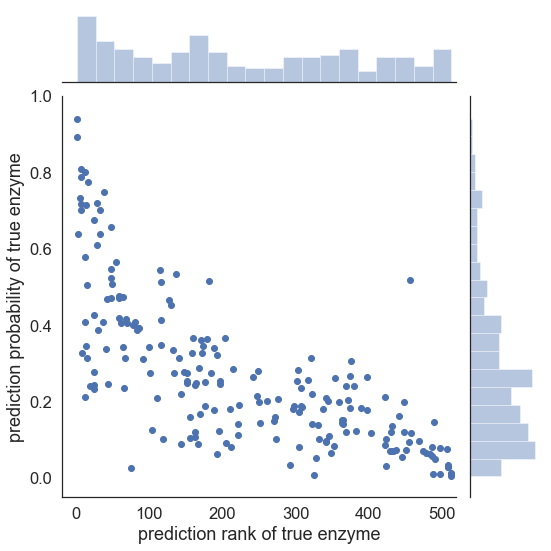

In [196]:
# seaborn jointplot

joint_fig = sns.jointplot(x='prediction_rank', y='prediction_prob', data=validation_df, dropna=True,
                          height=8, xlim=(-20, 520), ylim=(-0.05, 1.0), 
                          marginal_kws={'bins':20, 'norm_hist':True})
joint_fig.set_axis_labels('prediction rank of true enzyme', 'prediction probability of true enzyme')
# fig.title('model performance with validation reactions:\npredicted probability vs. predicted rank')

In [197]:
# save the figure

joint_fig.savefig('../figures/validation_scatter_fig.png')

In [198]:
# calculate positives:

positive_df = no_na_df[no_na_df['prediction_prob'] > 0.5]
accuracy = positive_df.shape[0] / no_na_df.shape[0]
min_pos = positive_df['prediction_rank'].min()
max_pos = positive_df['prediction_rank'].max()
median_pos = positive_df['prediction_rank'].median()

print('accuracy: {}\npositives range:{} - {}\nmedian pos rank:{}'.format(accuracy, max_pos, min_pos, median_pos))

accuracy: 0.14356435643564355
positives range:457.0 - 1.0
median pos rank:28.0


In [199]:
# linear regression of validation data

results = stats.linregress(no_na_df['prediction_rank'], no_na_df['prediction_prob'])
results = list(results)

labels = ['slope', 'intercept', 'r_value', 'p_value', 'std_err']
for i in range(len(results)):
    print('{}: {}'.format(labels[i], results[i]))
print('r_squared: {}'.format(results[2]**2))

slope: -0.0009207748960658634
intercept: 0.4820620908032184
r_value: -0.734335697061229
p_value: 1.6974849669779235e-35
std_err: 6.0183440980640685e-05
r_squared: 0.5392489159784012


Text(0.5, 1.0, 'model performance with validation reactions:\npredicted probability vs. predicted rank')

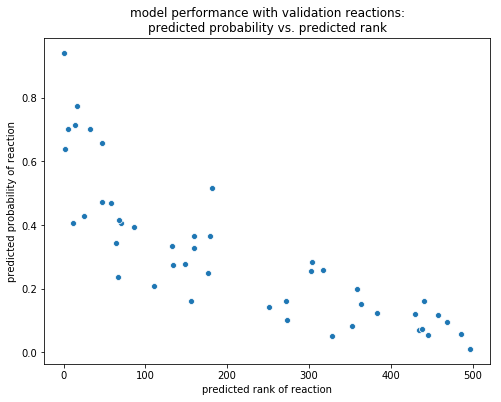

In [33]:
# scatter plot

scatter, axis = plt.subplots(1, 1, figsize=(8, 6))
fig = sns.scatterplot(x='prediction_rank', y='prediction_prob', data=validation_df, ax=axis)
axis.set_xlabel('predicted rank of reaction')
axis.set_ylabel('predicted probability of reaction')
axis.set_title('model performance with validation reactions:\npredicted probability vs. predicted rank')


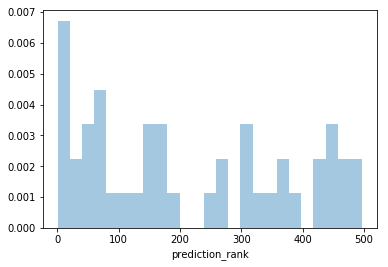

In [21]:
rank_hist = sns.distplot(validation_df['prediction_rank'].dropna(), kde=False, bins=25, norm_hist=True)

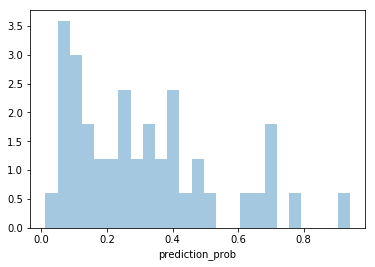

In [22]:
prob_hist = sns.distplot(validation_df['prediction_prob'].dropna(), kde=False, bins=25, norm_hist=True)